# [CODING A DIFFERENT DENSITY ESTIMATION (BAYES CLASSIFIER)]

In [37]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [38]:
#importing data

data = pd.read_csv('assignmentcounts.csv',index_col=0)
data.head()

,GTEX-1117F-0426-SM-5EGHI,GTEX-111CU-2026-SM-5GZZC,GTEX-111FC-0326-SM-5GZZ1,GTEX-111VG-2626-SM-5GZY2,GTEX-111YS-2326-SM-5987L,GTEX-1122O-2426-SM-5GIDN,GTEX-1128S-2426-SM-5H11B,GTEX-113JC-2726-SM-5EGIS,GTEX-117XS-2526-SM-5H11G,GTEX-117YW-2426-SM-5Q5AE,GTEX-117YX-2526-SM-5EQ4Q,GTEX-1192X-0426-SM-5GIEE,GTEX-11DXW-0726-SM-5H12J,GTEX-11DXX-2726-SM-5PNXO,GTEX-11DXY-2726-SM-5GID2,GTEX-11DXZ-2426-SM-5N9DT,GTEX-11DZ1-0926-SM-5EQ5R,GTEX-11EI6-0326-SM-5EQ6G,GTEX-11EM3-2126-SM-5H11M,GTEX-11EMC-2626-SM-59864,GTEX-11EQ8-0526-SM-5N9BC,GTEX-11EQ9-2126-SM-5PNVW,GTEX-11GS4-2526-SM-5A5KT,GTEX-11GSO-2526-SM-5PNVX,GTEX-11GSP-2726-SM-5A5LJ,GTEX-11H98-0326-SM-5HL4S,GTEX-11I78-2426-SM-5A5K9,GTEX-11LCK-1226-SM-5Q5AM,GTEX-11NSD-2026-SM-5HL5U,GTEX-11NUK-0226-SM-5A5L4,GTEX-11NV4-0326-SM-5HL58,GTEX-11O72-0326-SM-5986D,GTEX-11OC5-0326-SM-5PNW5,GTEX-11OF3-2526-SM-5P9JL,GTEX-11ONC-2426-SM-5GU7H,GTEX-11P7K-1926-SM-5GU6R,GTEX-11P81-2526-SM-5GU6H,GTEX-11P82-1826-SM-5PNYJ,GTEX-11PRG-0326-SM-5GU53,GTEX-11TT1-2326-SM-5GU6N,...,GTEX-ZF29-2426-SM-DO92G,GTEX-ZF2S-2126-SM-4WWAY,GTEX-ZF3C-0326-SM-4WWBF,GTEX-ZGAY-0726-SM-DO91O,GTEX-ZLFU-2526-SM-DO91K,GTEX-ZLV1-2126-SM-4WWD2,GTEX-ZLWG-2126-SM-DO91M,GTEX-ZP4G-2026-SM-57WEH,GTEX-ZPCL-2026-SM-57WFD,GTEX-ZPIC-2526-SM-57WDP,GTEX-ZQG8-1226-SM-51MRX,GTEX-ZQUD-1726-SM-7P8ON,GTEX-ZT9X-1826-SM-57WDU,GTEX-ZTPG-0126-SM-5O9AL,GTEX-ZTX8-1626-SM-51MRY,GTEX-ZUA1-0326-SM-5NQA3,GTEX-ZV68-0526-SM-59HKI,GTEX-ZV6S-2126-SM-4YCEM,GTEX-ZV7C-2426-SM-5NQ7Q,GTEX-ZVE1-0526-SM-5NQ71,GTEX-ZVE2-0626-SM-5GU7I,GTEX-ZVP2-2126-SM-5GU6E,GTEX-ZVT2-2426-SM-57WCQ,GTEX-ZVT3-0526-SM-5GIE9,GTEX-ZVT4-0326-SM-51MS5,GTEX-ZVTK-0626-SM-5GU6Y,GTEX-ZVZO-0326-SM-5HL4N,GTEX-ZVZP-2526-SM-57WBR,GTEX-ZWKS-0326-SM-5NQ7G,GTEX-ZXG5-0326-SM-5GICH,GTEX-ZY6K-2026-SM-5GZXQ,GTEX-ZYFC-0526-SM-5GIDF,GTEX-ZYFD-0326-SM-5NQ8I,GTEX-ZYFG-2426-SM-5GIE8,GTEX-ZYT6-1626-SM-5E45R,GTEX-ZYW4-0526-SM-5GZZ5,GTEX-ZYY3-0526-SM-5E45G,GTEX-ZZ64-1526-SM-5E43K,GTEX-ZZPT-0626-SM-5GZXT,GTEX-ZZPU-2626-SM-5E45Y
ENSG00000260534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000227167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000202382,12,3,0,0,0,0,3,0,0,5,4,0,0,3,0,0,0,0,2,2,0,4,0,6,0,7,0,3,3,0,2,10,0,0,2,0,0,1,3,4,...,0,1,0,3,5,5,2,4,2,2,2,0,2,2,0,0,0,0,0,2,0,0,0,0,2,0,4,5,0,0,1,10,8,4,0,4,3,0,0,0
ENSG00000179913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000272247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


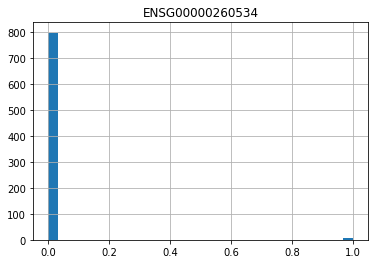

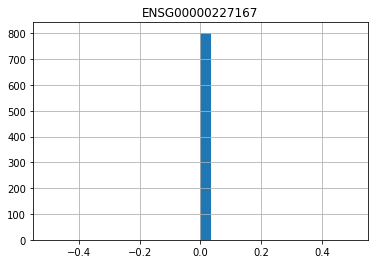

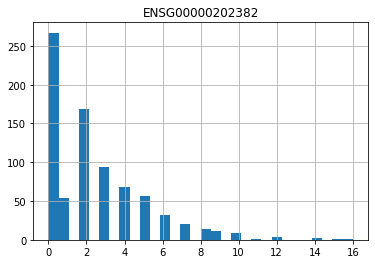

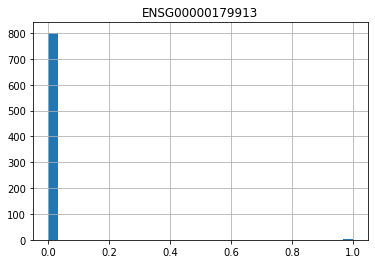

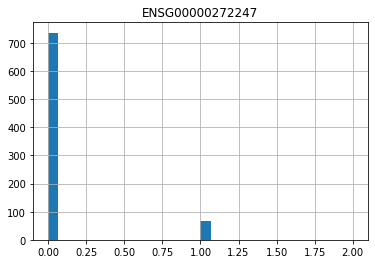

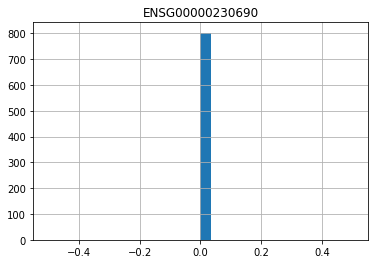

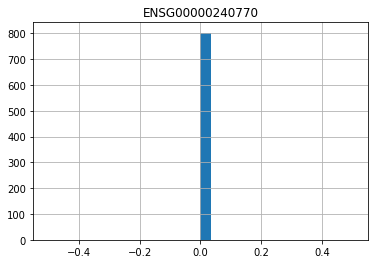

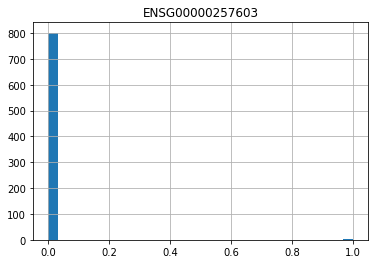

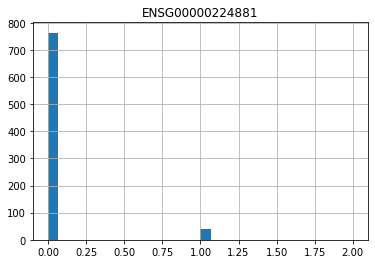

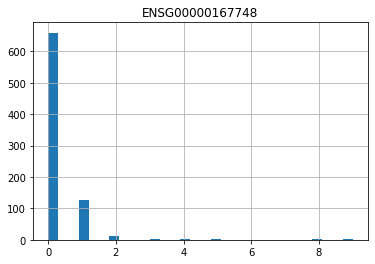

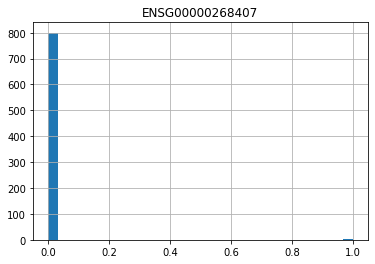

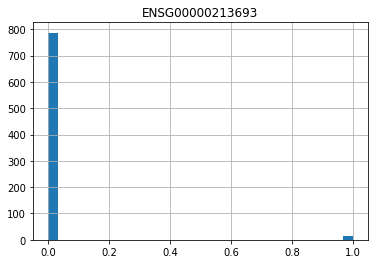

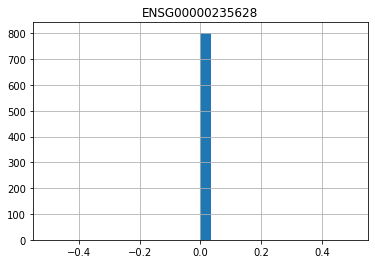

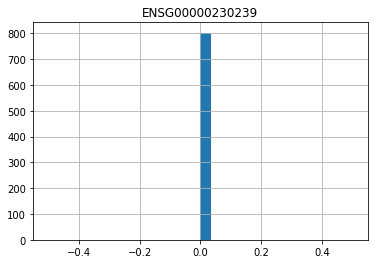

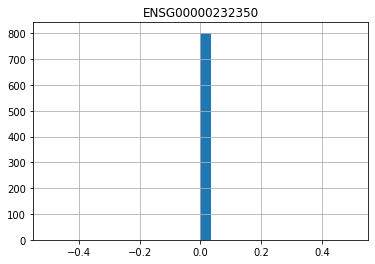

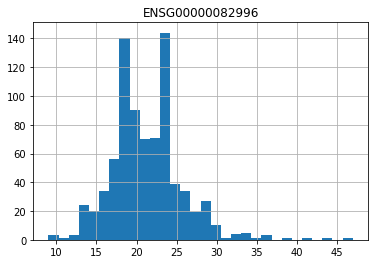

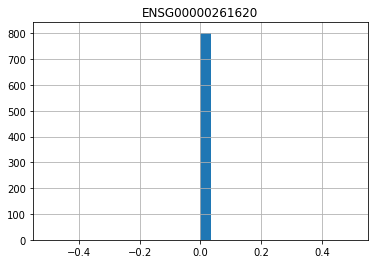

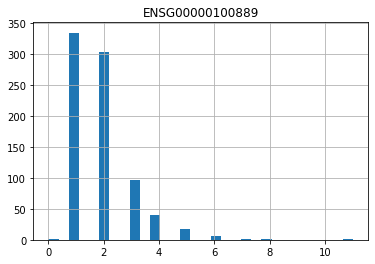

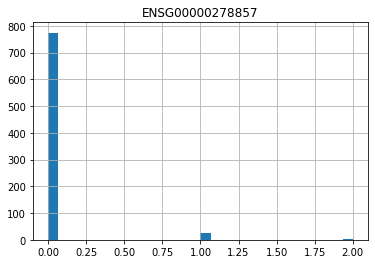

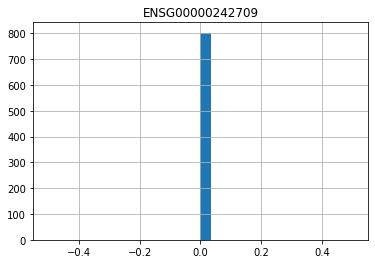

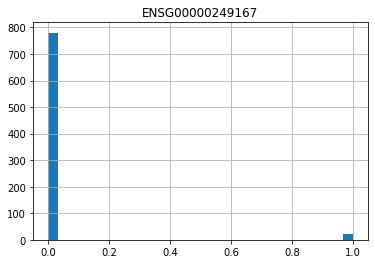

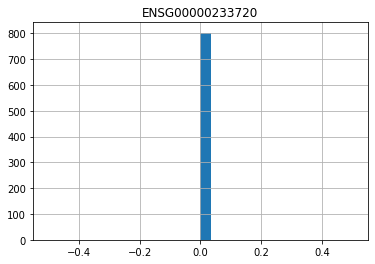

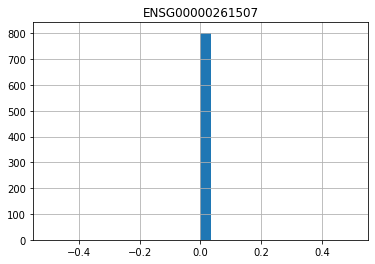

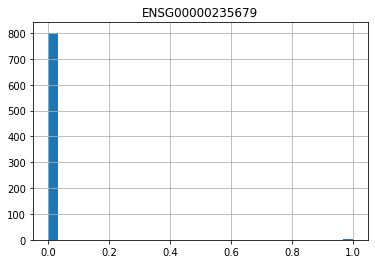

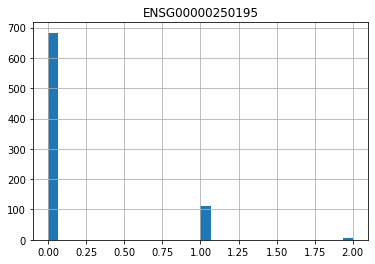

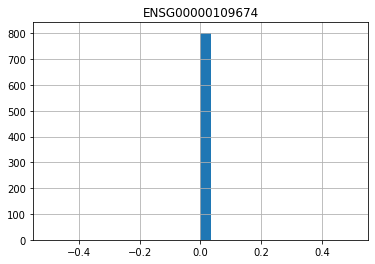

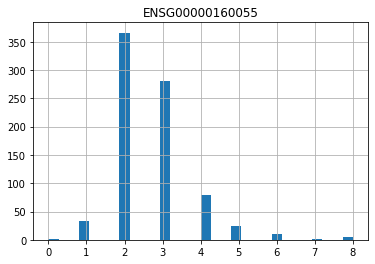

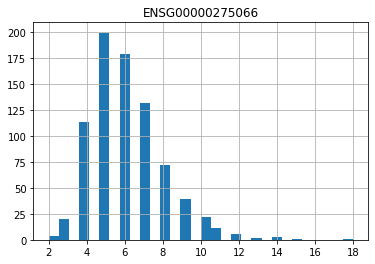

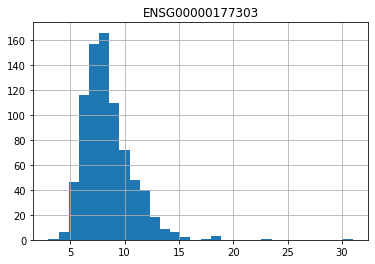

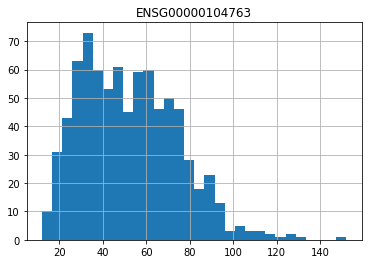

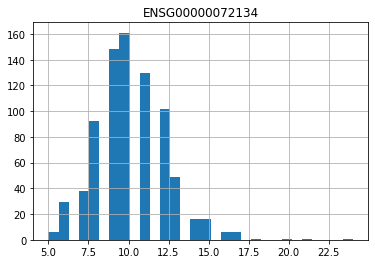

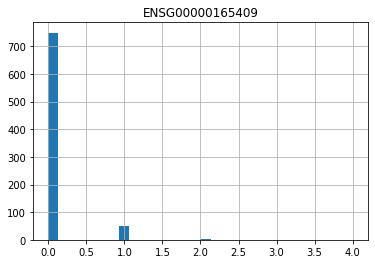

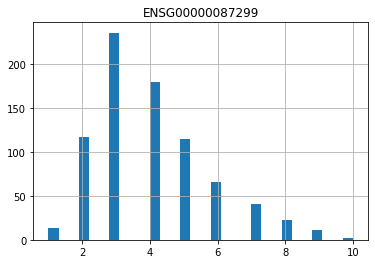

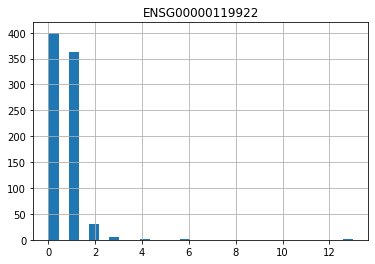

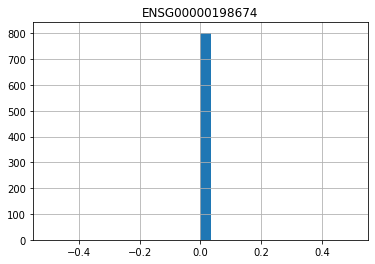

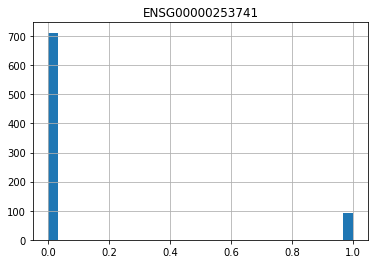

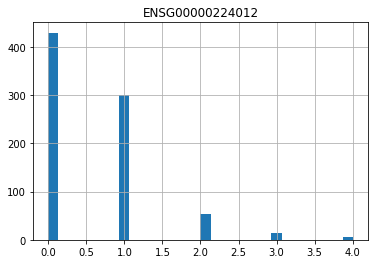

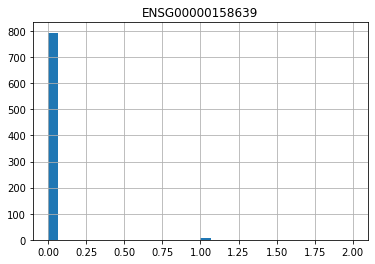

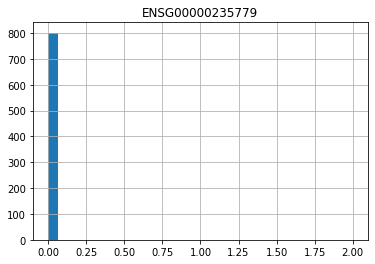

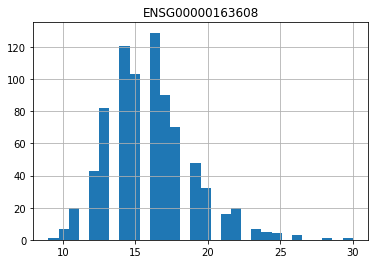

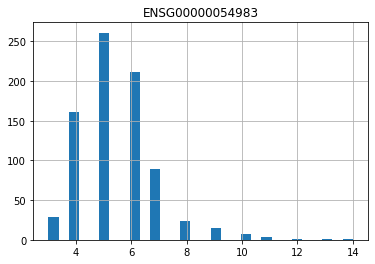

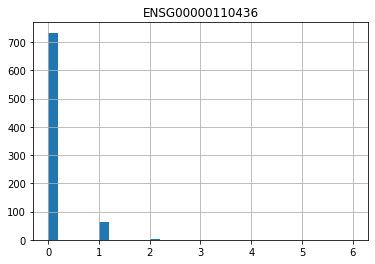

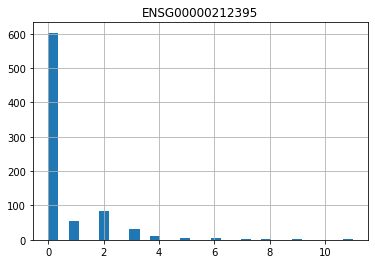

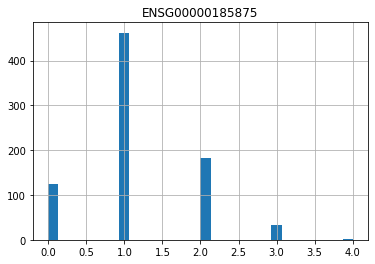

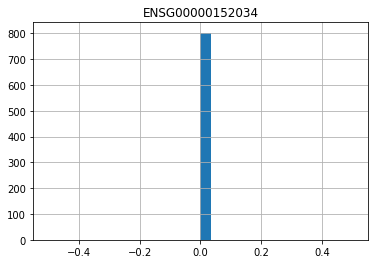

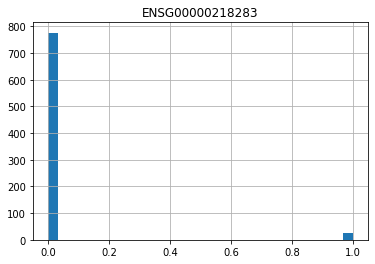

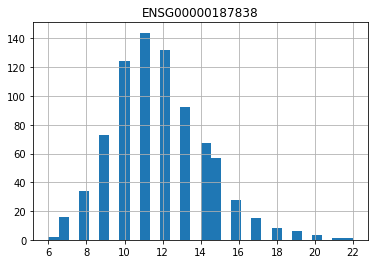

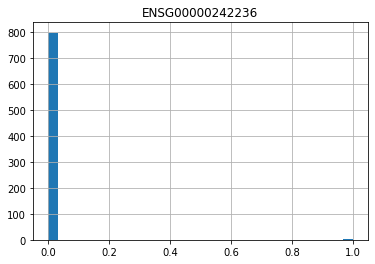

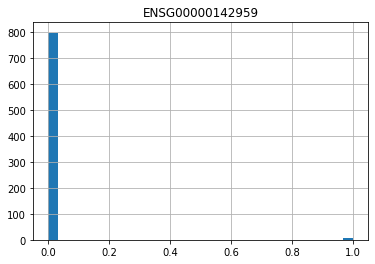

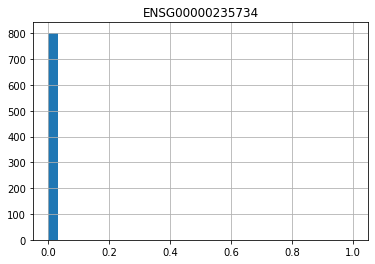

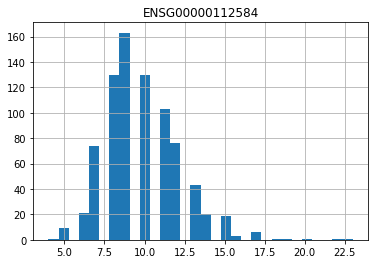

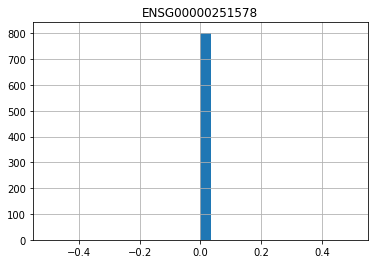

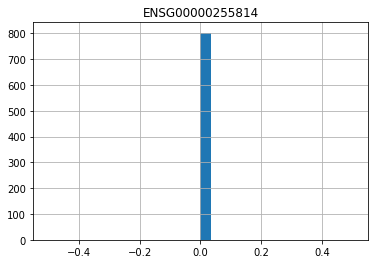

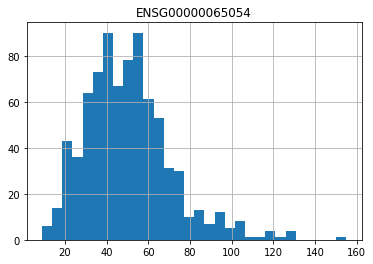

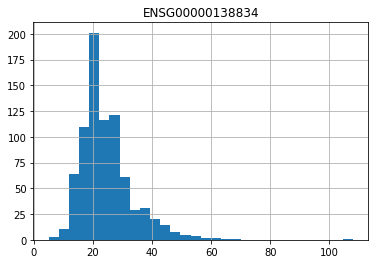

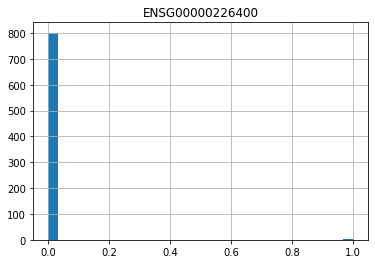

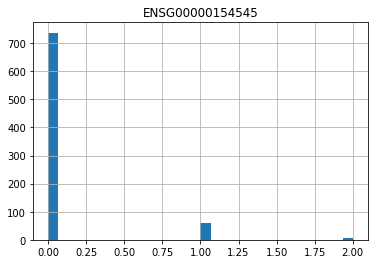

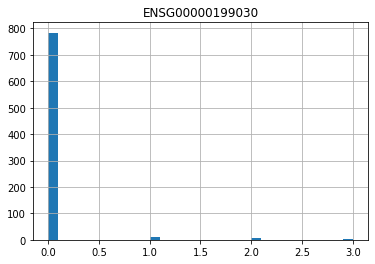

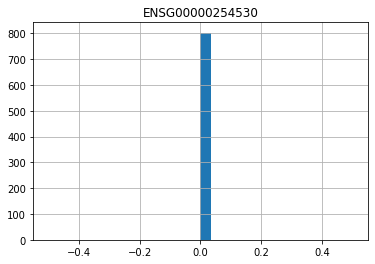

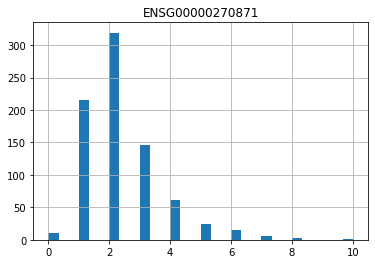

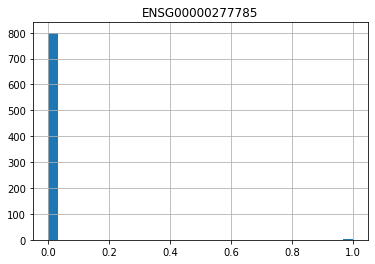

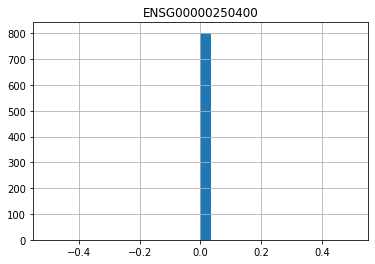

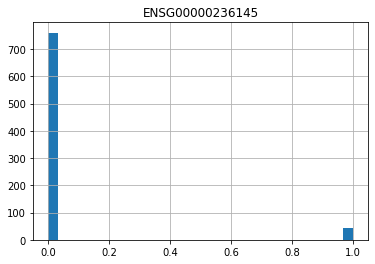

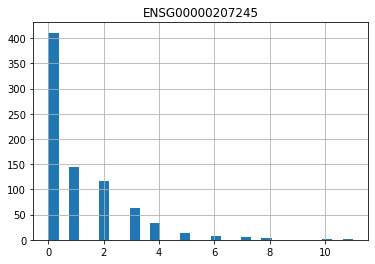

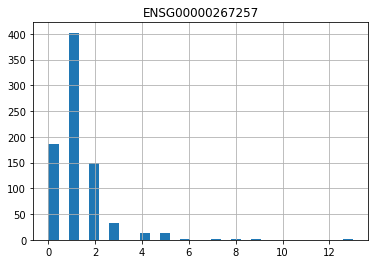

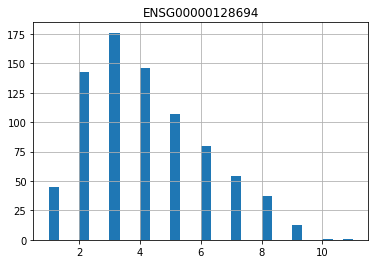

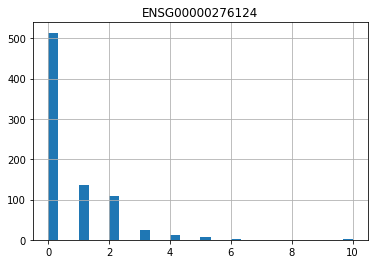

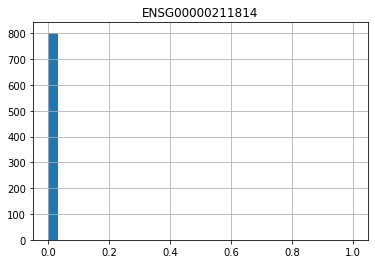

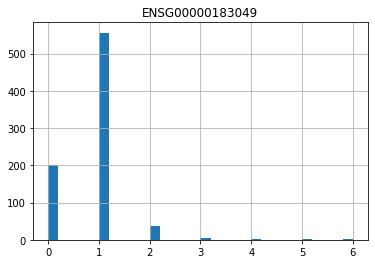

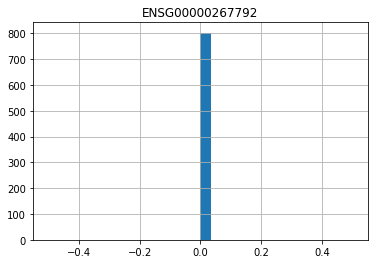

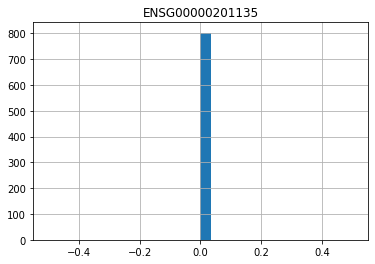

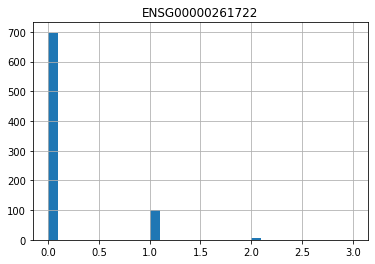

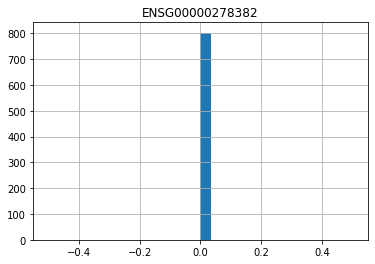

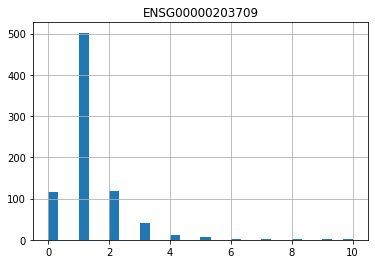

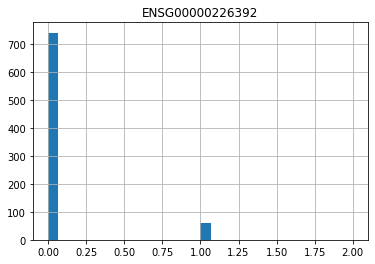

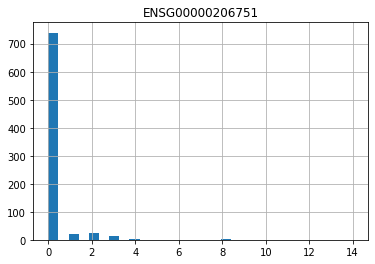

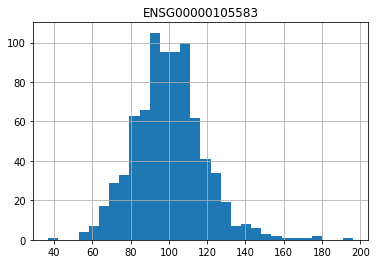

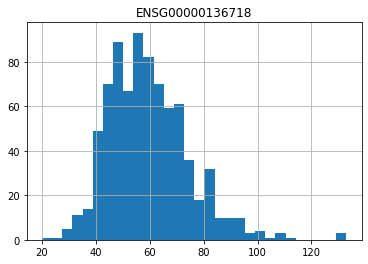

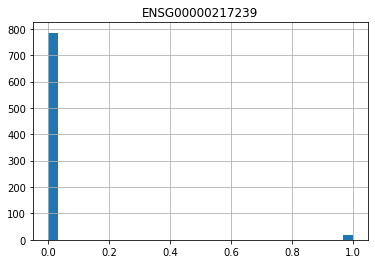

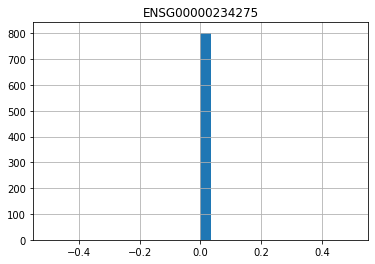

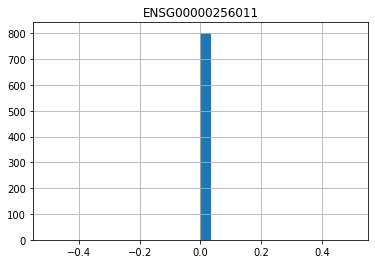

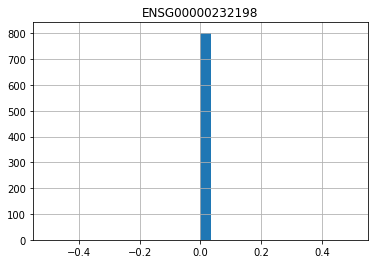

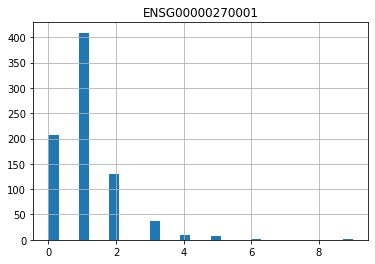

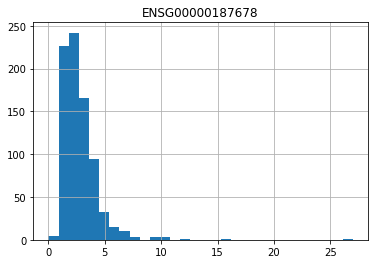

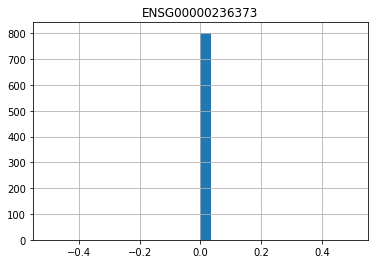

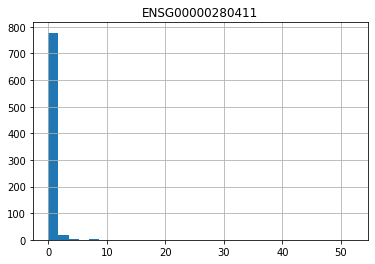

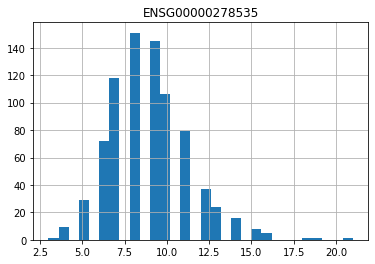

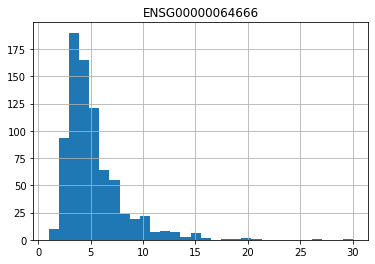

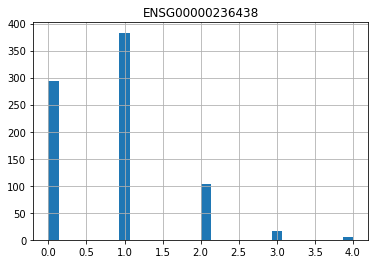

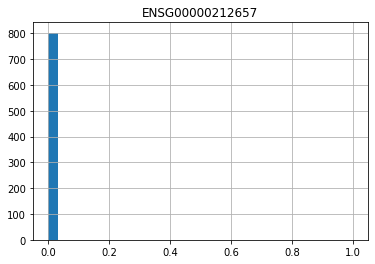

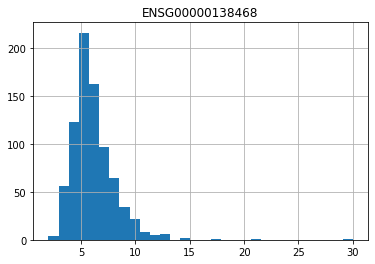

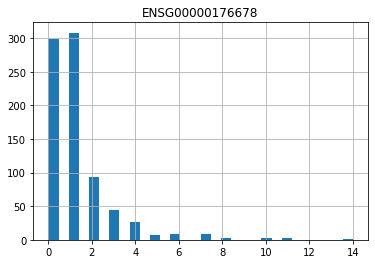

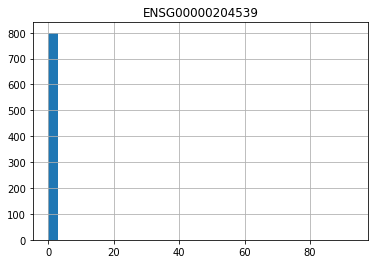

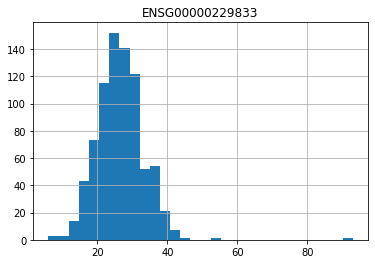

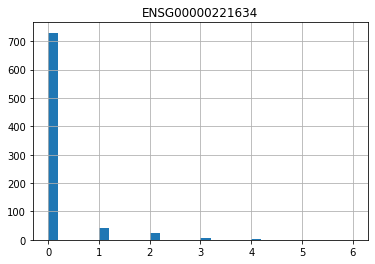

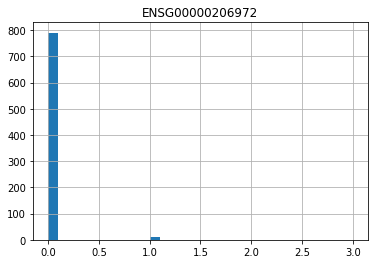

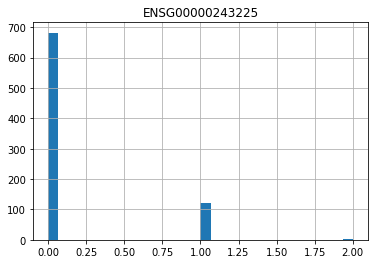

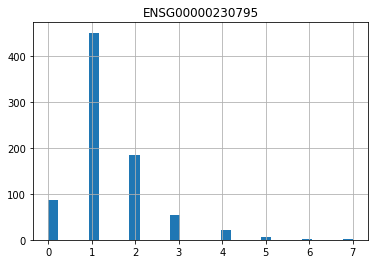

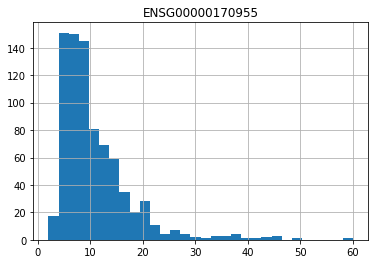

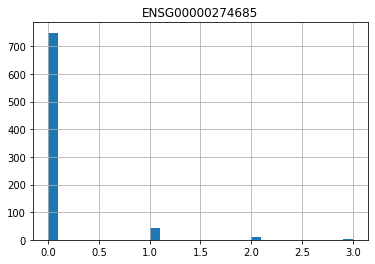

In [39]:
#analysing the distribution of a single example gene
gene_data = data.T
columns = list(gene_data.columns.values)
for i in range(100):
  gene_data.hist(column=columns[i],bins=30)

# Finding the nature of distribution

In [40]:
from scipy import stats
from scipy import integrate

In [41]:
list_of_distributions = ['beta','cauchy','gamma','norm','lognorm']
i=0
distributions = []
for gene in columns:
  if np.count_nonzero(gene_data[gene].to_numpy())!=0:
    score, fdist = 0, ''
    for d in list_of_distributions:
      dist = getattr(stats,d)
      param = dist.fit(gene_data[gene])
      a = stats.kstest(gene_data[gene],d,args=param)
      if a[1]>score:
        score = a[1]
        fdist = d
    distributions.append(fdist)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


3254


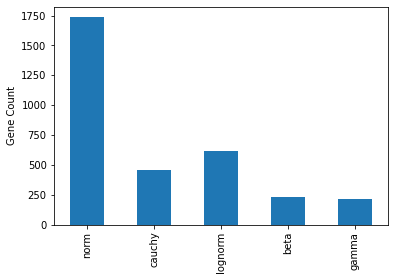

In [42]:
from collections import Counter

letter_counts = Counter(distributions)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',legend=None)
plt.ylabel('Gene Count')
print(len(distributions))

In [43]:
#number of genes with no expression
4444-3254

1190

In [101]:
#fitting normal distribution as an example case
parameters = []
for gene in columns:
      dist = getattr(stats,'norm')
      param = dist.fit(gene_data[gene])
      parameters.append(list(param))

In [79]:
#estimating parameters

def lognormal_parameters(arr):
  mu = np.sum(arr)/len(arr)
  sigma = np.std(arr)
  return mu,sigma
  

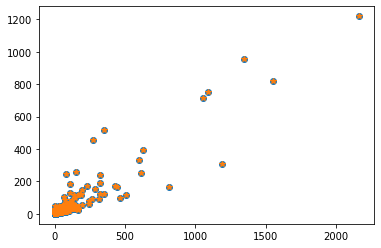

4444

In [80]:
#diagnostic plot when normal distribution is used
genes = gene_data.to_numpy()
m,n = genes.shape
mu_ml,sigma_ml,expect,var = [],[],[],[]

for i in range(genes.shape[1]):
  mu,sigma = lognormal_parameters(genes[:,i])
  mu_ml.append(mu)
  sigma_ml.append(sigma)

plt.plot(np.array(parameters)[:,0],np.array(parameters)[:,1],'o')
plt.plot(mu_ml,sigma_ml,'*')
plt.show()
len(mu_ml)
